In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [108]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_pts, random_state=123, centers=centers, cluster_std=0.4)


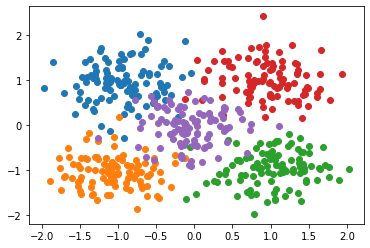

In [109]:
plt.scatter(x=X[y==0,0],y=X[y==0,1])
plt.scatter(x=X[y==1,0],y=X[y==1,1])
plt.scatter(x=X[y==2,0],y=X[y==2,1])
plt.scatter(x=X[y==3,0],y=X[y==3,1])
plt.scatter(x=X[y==4,0],y=X[y==4,1])

In [110]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [111]:
model = Sequential()

model.add(Dense(5,input_shape=(2,),activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])


In [112]:
model.fit(x=X, y=y_cat, batch_size=32, epochs=60)

Epoch 1/60


ValueError: in user code:

    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\ProgramData\Anaconda3\envs\general_env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_10 is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape (None, 2)


In [ ]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    # print(y_span)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()
    # print(xx_)
    # print(yy_)
    grid = np.c_[xx_,yy_]
    # print(grid)
    pred_func = np.argmax(model.predict(grid), axis=-1)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

[2]


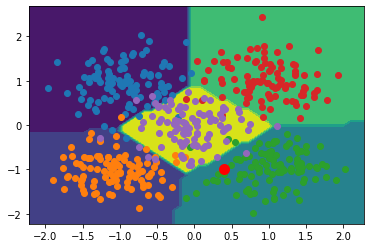

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(x=X[y==0,0],y=X[y==0,1])
plt.scatter(x=X[y==1,0],y=X[y==1,1])
plt.scatter(x=X[y==2,0],y=X[y==2,1])
plt.scatter(x=X[y==3,0],y=X[y==3,1])
plt.scatter(x=X[y==4,0],y=X[y==4,1])
x = 0.4
y = -1
point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis=-1)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print(prediction)